# COMP 551 Project 4 Kaggle MNIST

### Ran Cheng, 260768706   |   XXXX, XXXXXXX    |    XXXX, XXXXXXX

In [1]:
%matplotlib inline
# import data
import numpy   as np 
import scipy.misc # to visualize only  
x = np.loadtxt("./Data/train_x.csv", delimiter=",") # load from text 
y = np.loadtxt("./Data/train_y.csv", delimiter=",") 
x = x.reshape(-1, 64, 64) # reshape 
y = y.reshape(-1, 1) 

y[3]:  [0.]


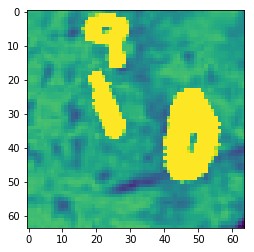

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x[3])
print("y[3]: ", y[3])

In [3]:
#split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### 1. Start With Baseline, Linear SVM

In [4]:
from sklearn import datasets, svm, metrics

############### Classification with grid search ##############
# If you don't want to wait, comment this section and uncommnet section below with
# standalone SVM classifier

# Create parameters grid for RBF kernel, we have to set C and gamma
from sklearn.model_selection import GridSearchCV
# generate matrix with all gammas
# [ [10^-4, 2*10^-4, 5*10^-4], 
#   [10^-3, 2*10^-3, 5*10^-3],
#   ......
#   [10^3, 2*10^3, 5*10^3] ]
#gamma_range = np.outer(np.logspace(-4, 3, 8),np.array([1,2, 5]))
gamma_range = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
gamma_range = gamma_range.flatten()

# generate matrix with all C
#C_range = np.outer(np.logspace(-3, 3, 7),np.array([1,2, 5]))
C_range = np.outer(np.logspace(-1, 1, 3),np.array([1,5]))
# flatten matrix, change to 1D numpy array
C_range = C_range.flatten()

parameters = {'kernel':['rbf'], 'C':C_range, 'gamma': gamma_range}

In [5]:
# reshape X data to 2d for linear fitting
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [6]:
X_train.shape

(42500, 4096)

In [7]:
def plot_param_space_scores(scores, C_range, gamma_range):
    """
    Draw heatmap of the validation accuracy as a function of gamma and C
    
    
    Parameters
    ----------
    scores - 2D numpy array with accuracies
    
    """
    #
    # The score are encoded as colors with the hot colormap which varies from dark
    # red to bright yellow. As the most interesting scores are all located in the
    # 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
    # as to make it easier to visualize the small variations of score values in the
    # interesting range while not brutally collapsing all the low score values to
    # the same color.

    
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.jet,
               norm=MidpointNormalize(vmin=0.5, midpoint=0.9))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.title('Validation accuracy')  

In [8]:
import time
import datetime as dt

In [ ]:

svm_clsf = svm.SVC()
grid_clsf = GridSearchCV(estimator=svm_clsf,param_grid=parameters,n_jobs=1, verbose=2)


start_time = dt.datetime.now()
print('Start param searching at {}'.format(str(start_time)))

grid_clsf.fit(X_train, y_train)

elapsed_time= dt.datetime.now() - start_time
print('Elapsed time, param searching {}'.format(str(elapsed_time)))
sorted(grid_clsf.cv_results_.keys())

classifier = grid_clsf.best_estimator_
params = grid_clsf.best_params_



scores = grid_clsf.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

plot_param_space_scores(scores, C_range, gamma_range)


######################### end grid section #############

In [ ]:
################ Classifier with good params ###########
# Create a classifier: a support vector classifier

param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

# We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

########################################################

Start learning at 2018-03-04 18:03:04.340541


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
